**Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import necessary libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load the dataset**

In [4]:
file_path = '/content/drive/MyDrive/Churn_Modelling.csv'
customer_data = pd.read_csv(file_path)

**Data Preprocessing**

**'Exited' is the target variable representing customer churn**

In [5]:
X = customer_data.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = customer_data['Exited']

**Convert categorical variables to dummy/indicator variables**

In [6]:
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

**Split the dataset into training and testing sets**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Standardize the features**

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Build and train the Logistic Regression model**

In [9]:
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Build and train the Random Forest Classifier model**

In [10]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Evaluate the Logistic Regression model**

In [11]:
logistic_y_pred = logistic_classifier.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_conf_matrix = confusion_matrix(y_test, logistic_y_pred)
logistic_class_report = classification_report(y_test, logistic_y_pred)

**Evaluate the Random Forest Classifier model**

In [12]:
random_forest_y_pred = random_forest_classifier.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_y_pred)
random_forest_class_report = classification_report(y_test, random_forest_y_pred)

**Display Model Evaluation Metrics for Logistic Regression**

In [13]:
print("\nLogistic Regression Model Evaluation Metrics:")
print(f"Accuracy: {logistic_accuracy:.4f}")
print("\nConfusion Matrix:")
print(logistic_conf_matrix)
print("\nClassification Report:")
print(logistic_class_report)


Logistic Regression Model Evaluation Metrics:
Accuracy: 0.8110

Confusion Matrix:
[[1543   64]
 [ 314   79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



**Display Model Evaluation Metrics for Random Forest Classifier**

In [14]:
print("\nRandom Forest Classifier Model Evaluation Metrics:")
print(f"Accuracy: {random_forest_accuracy:.4f}")
print("\nConfusion Matrix:")
print(random_forest_conf_matrix)
print("\nClassification Report:")
print(random_forest_class_report)


Random Forest Classifier Model Evaluation Metrics:
Accuracy: 0.8665

Confusion Matrix:
[[1550   57]
 [ 210  183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



**Graph for Customer Demographics - Gender Wise**

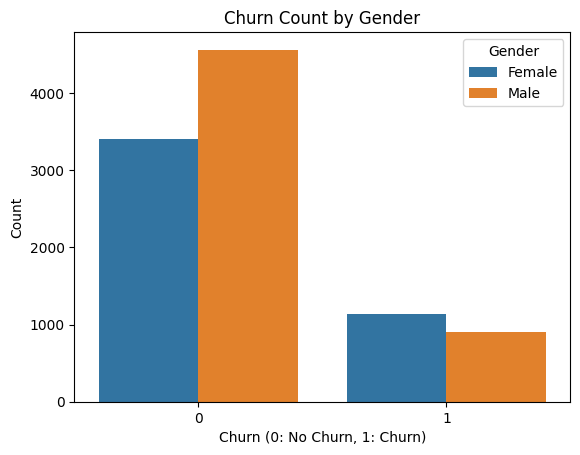

In [18]:
sns.countplot(x='Exited', hue='Gender', data=customer_data)
plt.title('Churn Count by Gender')
plt.xlabel('Churn (0: No Churn, 1: Churn)')
plt.ylabel('Count')
plt.show()

**Graph for Customer Demographics - Geography Wise**

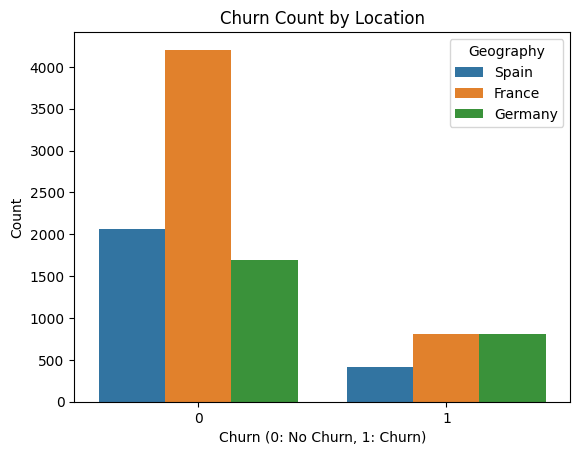

In [19]:
sns.countplot(x='Exited', hue='Geography', data=customer_data)
plt.title('Churn Count by Location')
plt.xlabel('Churn (0: No Churn, 1: Churn)')
plt.ylabel('Count')
plt.show()